# Introduction

This research explores how students’ daily lifestyle habits—such as study hours, sleep, physical activity, and social engagement—relate to their academic performance and stress levels. By analyzing patterns in a large dataset of self-reported behaviors and outcomes, the study aims to identify which habits most strongly influence GPA and well-being. The findings may offer practical insights for students seeking to balance productivity with personal wellness. 

It is important to study this because academic success is often viewed through the narrow lens of study hours alone, while other lifestyle factors may play equally significant roles. As students navigate demanding academic environments, understanding how their choices outside the classroom impact their GPA and well-being can lead to more effective support systems and healthier routines. I’m interested in this question because I want to be able to bridge academic performance with holistic wellness, offer insights that could inform school policies, counseling programs, and personal time management strategies. This topic resonates with broader conversations about student mental health and the importance of balance in education. By analyzing these relationships we can move beyond anecdotal advice and provide evidence-based recommendations.

## Overarching Question: How do students’ daily lifestyle habits—such as study time, sleep, physical activity, and social engagement—affect their academic performance and stress levels?

This question is important because academic success is often viewed through the narrow lens of study hours alone, while other lifestyle factors may play equally significant roles. As students navigate demanding academic environments, understanding how their choices outside the classroom impact their GPA and well-being can lead to more effective support systems and healthier routines. I’m interested in this question because I want to be able to bridge academic performance with holistic wellness, offer insights that could inform school policies, counseling programs, and personal time management strategies. This topic resonates with broader conversations about student mental health and the importance of balance in education. By analyzing these relationships we can move beyond anecdotal advice and provide evidence-based recommendations.

# Data

In [16]:
#Include any import statements you will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
file_name = "student_lifestyle_dataset.csv"
dataset_path = "data/" + file_name

df = pd.read_csv(dataset_path)

In [13]:
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

**Data Overview**

This [dataset](https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset) was published on Kaggle by Sumit Kumar. It was created for educational and analytical purposes.The data was self-reported by students who participated in the survey through Google Forms. The form was shared with students across different educational institutions, primarily focusing on those in India and other South Asian countries, where the Cumulative GPA (CGPA) system is widely used. This ensures that the dataset is contextually relevant to the educational environment in these regions. 

The dataset contains data from 2,000 students collected via a Google Form survey. It includes information on study hours, extracurricular activities, sleep, socializing, physical activity, stress levels, and CGPA. The data covers an academic year from August 2023 to May 2024 and reflects student lifestyles. This dataset can help analyze the impact of daily habits on academic performance and student well-being.

>Number of Records: 2000 rows <br>
>Number of Columns: 8 columns <br>
>Column Names: Student ID, Study Hours, Extracurricular Hours, Sleep Hours, Social Hours, Physical Activity Hours, GPA, and Stress level

We're going to clean our data a little by renaming some of the headers and getting rid of Student_ID

In [14]:
df=df.drop('Student_ID', axis=1)
df=df.rename(columns={'Study_Hours_Per_Day':'studying', 'Extracurricular_Hours_Per_Day':'extracurriculars', 'Sleep_Hours_Per_Day':'sleeping', 'Social_Hours_Per_Day':'socializing', 'Physical_Activity_Hours_Per_Day':'working_out', 'Stress_Level':'stress'})
df.head()

studying  extracurriculars  sleeping  socializing  working_out   GPA  \
0       6.9               3.8       8.7          2.8          1.8  2.99   
1       5.3               3.5       8.0          4.2          3.0  2.75   
2       5.1               3.9       9.2          1.2          4.6  2.67   
3       6.5               2.1       7.2          1.7          6.5  2.88   
4       8.1               0.6       6.5          2.2          6.6  3.51   

     stress  
0  Moderate  
1       Low  
2       Low  
3  Moderate  
4      High

# Methods and Results

### First Research Question: 
## Which lifestyle factors (study hours, sleep, physical activity, social time) are most strongly correlated with GPA?

### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 
  
To explore this question, I will focus on the columns: `studying`, `extracurriculars`, `sleeping`, `working_out`, `socializing`, `GPA`. I'm leaving out `stress` because this question addresses lifestyle factors and stress isn't a habit but an outcome. <br>

I will calculate the pearson correlation coefficient and create a heatmap that highlights the direction of the correlation using seaborn. If needed, I may need to find the spearman correlation for non-linear associations.



### Results 

In [115]:
habits=['studying','sleeping', 'working_out','socializing','extracurriculars']
heatmap_values={}
for var in habits:
    x=df[var].to_numpy()
    y = df['GPA'].to_numpy()
    r_matrix=np.corrcoef(x,y)
    corr=r_matrix [0,1]
    heatmap_values[var]= corr
    print(str(var)+' vs GPA → r ='+str(corr))


studying vs GPA → r =0.7344679806560518
sleeping vs GPA → r =-0.004278440948943774
working_out vs GPA → r =-0.341152464009962
socializing vs GPA → r =-0.08567714046513732
extracurriculars vs GPA → r =-0.03217353173983065


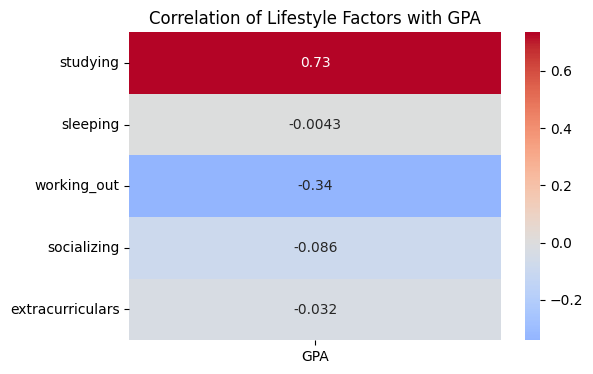

In [116]:
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame.from_dict(heatmap_values, orient='index', columns=['GPA']), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Lifestyle Factors with GPA')
plt.show()



### Second Research Question: 
## Is there a threshold of study hours beyond which GPA plateaus or declines?


### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 

To answer this question, I will focus on two key columns from the dataset: `studying` and `GPA`. These variables directly capture the relationship between time spent studying and academic performance.
I will use these variables to create visualizations and fit models. I’ll begin with a scatter plot to observe the raw distribution of GPA across different study hour values. Then, I’ll use Seaborn’s `regplot()` to add a linear regression line, and NumPy’s `polyfit()` to fit a second-degree polynomial curve. This will help detect any inflection point where GPA stops increasing or begins to decline. These tools allow for both visual and statistical interpretation of non-linear trends, and it makes it easier to identify a potential threshold effect. 

### Results 

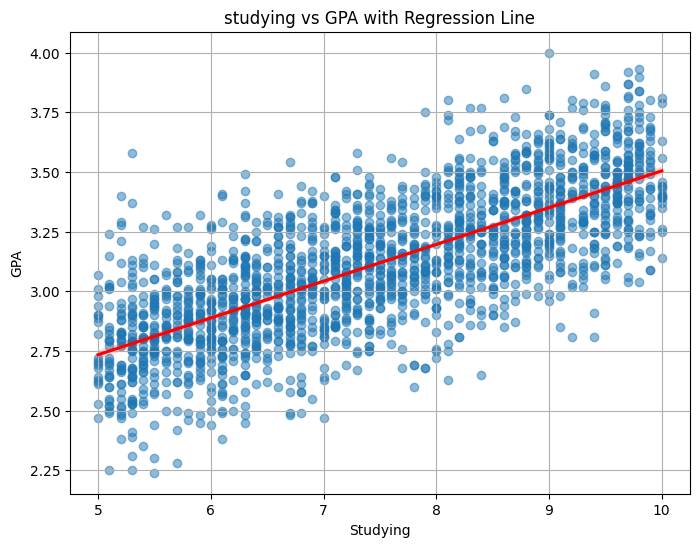

In [127]:
plt.figure(figsize=(8, 6))
sns.regplot(x='studying',y='GPA', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('studying vs GPA with Regression Line')
plt.xlabel('Studying')
plt.ylabel('GPA')
plt.grid(True)
plt.show()


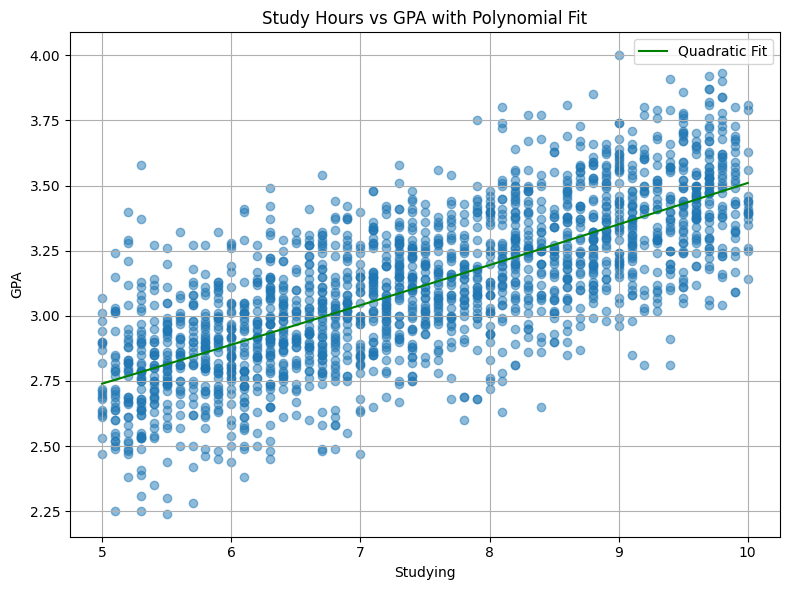

In [128]:
# Fit a 2nd-degree polynomial (quadratic)
coeffs = np.polyfit(df['studying'], df['GPA'], deg=2)
poly_eq = np.poly1d(coeffs)

# Generate predicted GPA values
x_vals = np.linspace(df['studying'].min(), df['studying'].max(), 100)
y_vals = poly_eq(x_vals)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['studying'], df['GPA'], alpha=0.5)
plt.plot(x_vals, y_vals, color='green', label='Quadratic Fit')
plt.title('Study Hours vs GPA with Polynomial Fit')
plt.xlabel('Studying')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Third Research Question: 
## How do students with high stress levels differ in lifestyle habits compared to those with low stress?

### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?*


For this question, we will be focusing on `stress` and categorizing `studying`, `sleeping`, `working_out`, `socializing`, `extracurriculars` bewteen low, moderate, and high stress. By doing so, I'll be capturing the possible relation between stress and lifestyle behaviors. Once I split the data into three groups, i'll comute and compare the mean and standard deviation of each lifestyle behaviors.

I'll be using boxplots or bar charts and t-tests. 

### Results 

                      High       Low  Moderate
studying          8.385034  5.474411  6.969585
sleeping          7.046453  8.063973  7.947626
working_out       3.960933  5.581818  4.336795
socializing       2.627794  2.890909  2.739614
extracurriculars  1.979786  1.988889  2.006380


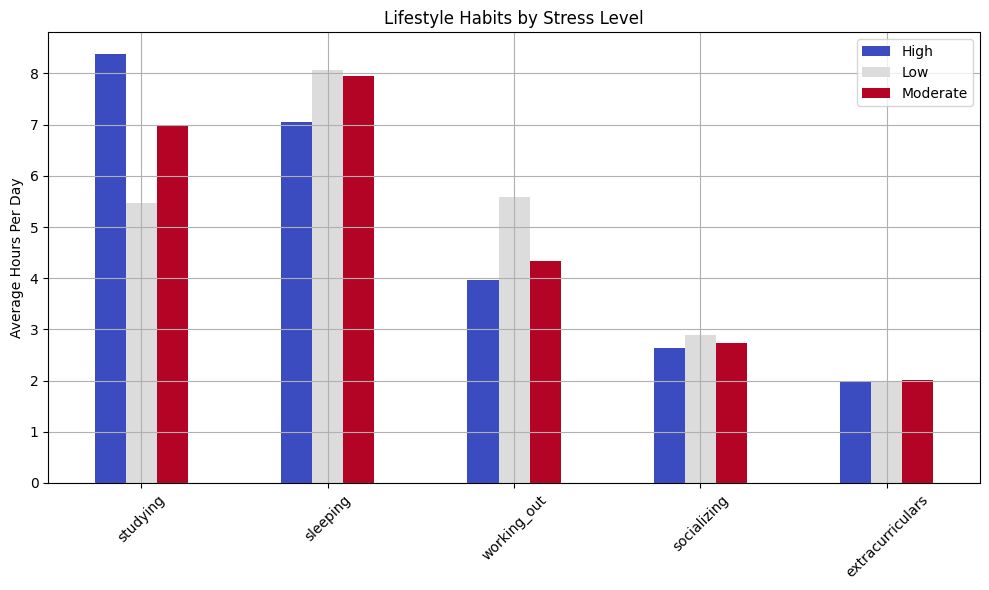

In [30]:
habits=['studying', 'sleeping','working_out', 'socializing','extracurriculars']

group_means = df.groupby('stress')[habits].mean().T
group_means.columns.name = None
print(group_means)

group_means.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Lifestyle Habits by Stress Level')
plt.ylabel('Average Hours Per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
print("T-tests")
for h in habits:
    high = df[df['stress'] == 'High'][h].to_numpy()
    mod = df[df['stress'] == 'Moderate'][h].to_numpy()
    low = df[df['stress'] == 'Low'][h].to_numpy()

    # Calculate means and standard deviations
    mean_diff = np.mean(high) - np.mean(low)
    pooled_std = np.sqrt(np.var(high, ddof=1)/len(high) + np.var(low, ddof=1)/len(low))
    t_stat = mean_diff / pooled_std
    
    print(str(h) + ": t = " + str(t_stat))

T-tests
studying: t = 69.5036426410152
sleeping: t = -11.963697983726032
working_out: t = -10.127179710552255
socializing: t = -2.382354439613457
extracurriculars: t = -0.11617129827155753


### Fourth Research Question: 
## Are there clusters of students with similar lifestyle profiles and academic outcomes?

### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?*


To explore this question, I will use K-means clustering to identify natural groupings in the dataset based on habits. The focal categories are: `studying`,`sleeping`,`working_out`,`socializing`,`extracurriculars`. I will also include `GPA` and `stress` for post-cluster comparison, but not in the clustering itself. 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


ModuleNotFoundError: No module named 'sklearn'

# Discussion

## Considerations

*It's important to recognize the limitations of our research.
Consider the following:*

- *Do the results give an accurate depiction of your research question? Why or why not?*
- *What were limitations of your datset?*
- *Are there any known biases in the data?*

✏️ *Write your answer below:*

## Summary

*Summarize what you discovered through the research. Consider the following:*

- *What did you learn about your media consumption/digital habits?*
- *Did the results make sense?*
- *What was most surprising?*
- *How will this project impact you going forward?*

✏️ *Write your answer below:*